<a href="https://colab.research.google.com/github/Monochrome901/BCS_project_work/blob/main/Neural_networks02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#create x&y values (features and labels)
x=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]

In [ ]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#creating training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
len(x),len(x_train),len(x_test)

(1338, 1070, 268)

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10),
                           tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

In [ ]:
#check the results
model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
                           tf.keras.layers.Dense(100),
                           tf.keras.layers.Dense(10),
                           tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

history=model_2.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=200,verbose=1)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 3ms/step - loss: 13109.1191 - mae: 13109.1191
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12110.5430 - mae: 12110.5430
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 11793.1387 - mae: 11793.1387
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 10923.8604 - mae: 10923.8604
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 9199.9453 - mae: 9199.9453
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 8322.5488 - mae: 8322.5488
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8292.5820 - mae: 8292.5820
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 8294.8828 - mae: 8294.8828
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 8285.1299 - mae: 8285.1299
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 8288.9150 - mae: 8288.9150
Epo

In [ ]:
model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8631.8887 - mae: 8631.8887


[8631.888671875, 8631.888671875]

Text(0.5, 0, 'epochs')

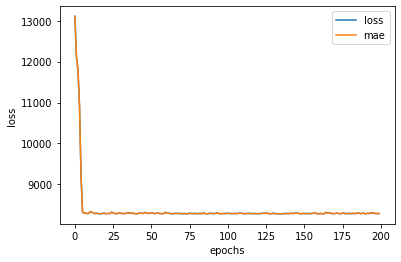

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#early stopping callback